In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import gymnasium as gym
import matplotlib.pyplot as plt
import numpy as np
from PPO import PPOAGENT
from DQN import DQNAGENT
from sac import SACAgent
from td3 import TD3Agent

# Discrete Action Space

### Experiment: CartPole-v1

In [3]:
env = gym.make("CartPole-v1")
num_episodes = 500
training_time = 480  # 480 seconds = 8 minutes

In [4]:
import torch
import random
SEED = 42
# env.seed(SEED)
env.action_space.seed(SEED)
torch.manual_seed(SEED)
np.random.seed(SEED)
random.seed(SEED)

In [12]:
def plot_mean_std_curves(all_rewards_dict, title='Learning Curve', xlabel='Episode', ylabel='Reward'):
    plt.figure(figsize=(10, 6))
    for label, rewards in all_rewards_dict.items():
        mean_rewards = rewards.mean(axis=0)
        std_rewards = rewards.std(axis=0)
        episodes = np.arange(len(mean_rewards))
        plt.plot(episodes, mean_rewards, label=label)
        plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig("DQN, hard vs polyak")
    plt.show()

In [9]:
def run_dqn_variant(env, num_episodes=200, seeds=[42, 7, 99]):
    all_rewards = []

    for seed in seeds:
        env.reset(seed=seed)
        np.random.seed(seed)
        torch.manual_seed(seed)

        dqn_polyak = DQNAGENT(
            env=env,
            lr=5e-4,           
            hidden_size=128,
            gamma=0.99,        
            tau=0.008,
            clip_value = 0.5,
            batch_size=256,    
            eps_start=0.95,
            eps_end=0.05,     
            eps_decay=600,     
            replay_size=100_000,
            learning_start = 100,
            train_freq = 2,
            target_update_freq = 0,
            is_first_update_target_hard = True
        )
        
        rewards = dqn_polyak.learn(num_episodes=num_episodes)
        all_rewards.append(rewards)

    return np.array(all_rewards) 

    

rewards_polyak_averaging = run_dqn_variant(env, num_episodes=400, seeds=[42, 7, 99])

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [31:54<00:00,  4.79s/it]


'\ndqn_polyak = DQNAGENT(\n    env=env,\n    lr=5e-4,           \n    hidden_size=128,\n    gamma=0.99,        \n    tau=0.008,\n    clip_value = 0.5,\n    batch_size=256,    \n    eps_start=0.95,\n    eps_end=0.05,     \n    eps_decay=600,     \n    replay_size=100_000,\n    learning_start = 100,\n    train_freq = 2,\n    target_update_freq = 0,\n    is_first_update_target_hard = True\n)\n\ndqn_rewards = dqn_polyak.learn(num_episodes=num_episodes)\n'

100%|██████████| 500/500 [06:52<00:00,  1.21it/s]


In [14]:
rewards_polyak_averaging_with_hard_start = rewards_polyak_averaging

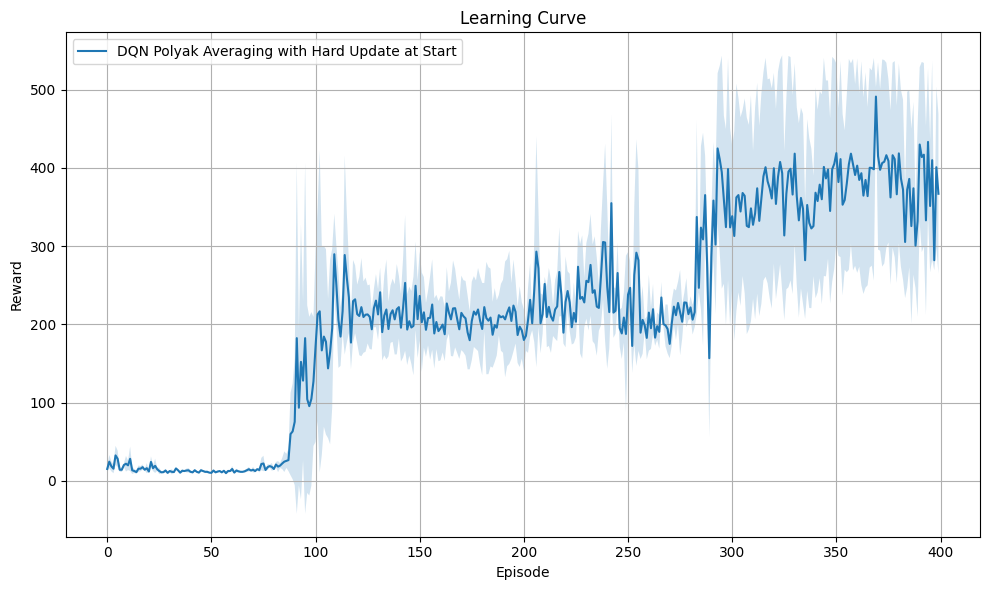

In [16]:
plot_mean_std_curves({
    "DQN Polyak Averaging with Hard Update at Start": rewards_polyak_averaging_with_hard_start,
})

In [17]:
def run_dqn_variant(env, num_episodes=200, seeds=[42, 7, 99]):
    all_rewards = []

    for seed in seeds:
        env.reset(seed=seed)
        np.random.seed(seed)
        torch.manual_seed(seed)

        dqn_polyak = DQNAGENT(
            env=env,
            lr=5e-4,           
            hidden_size=128,
            gamma=0.99,        
            tau=0.008,
            clip_value = 0.5,
            batch_size=256,    
            eps_start=0.95,
            eps_end=0.05,     
            eps_decay=600,     
            replay_size=100_000,
            learning_start = 100,
            train_freq = 2,
            target_update_freq = 0,
            is_first_update_target_hard = True
        )
        
        rewards = dqn_polyak.learn(num_episodes=num_episodes)
        all_rewards.append(rewards)

    return np.array(all_rewards) 

    

rewards_polyak_averaging = run_dqn_variant(env, num_episodes=400, seeds=[42, 7, 99])

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [09:59<00:00,  1.50s/it]


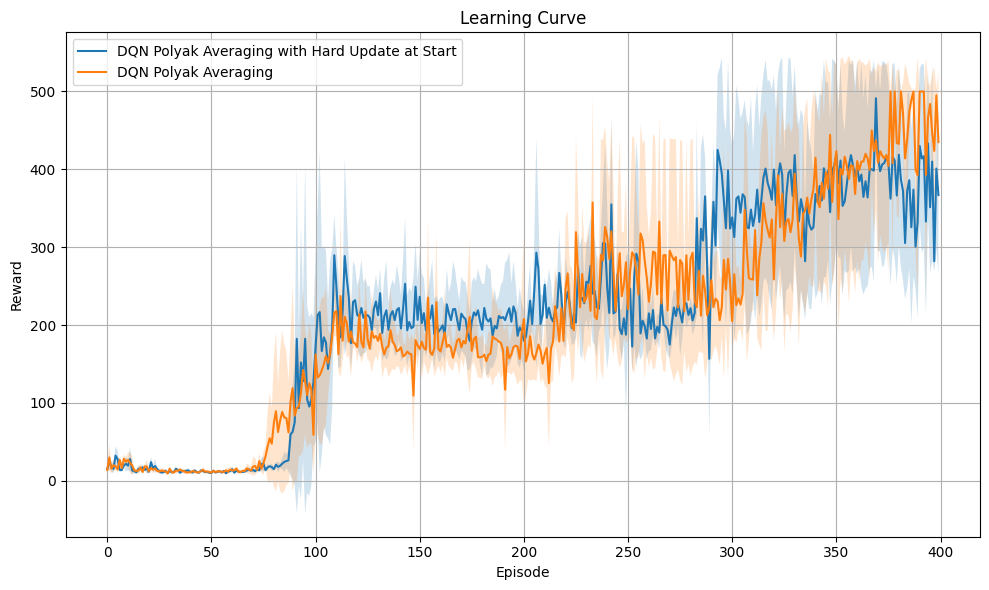

In [18]:
plot_mean_std_curves({
    "DQN Polyak Averaging with Hard Update at Start": rewards_polyak_averaging_with_hard_start,
    "DQN Polyak Averaging": rewards_polyak_averaging,
})

In [21]:
def run_dqn_variant(env, num_episodes=200, seeds=[42, 7, 99]):
    all_rewards = []

    for seed in seeds:
        env.reset(seed=seed)
        np.random.seed(seed)
        torch.manual_seed(seed)

        dqn_polyak = DQNAGENT(
            env=env,
            lr=5e-4,           
            hidden_size=128,
            gamma=0.95,        
            tau=0.005,
            clip_value = 1,
            batch_size=128,    
            eps_start=1.0,
            eps_end=0.02,     
            eps_decay=200,     
            replay_size=100_000,
            learning_start = 100,
            train_freq = 2,
            target_update_freq = 100,
            is_first_update_target_hard = False
        )
        
        rewards = dqn_polyak.learn(num_episodes=num_episodes)
        all_rewards.append(rewards)

    return np.array(all_rewards) 

    

rewards_hard_update = run_dqn_variant(env, num_episodes=400, seeds=[42, 7, 99])

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [03:47<00:00,  1.76it/s]


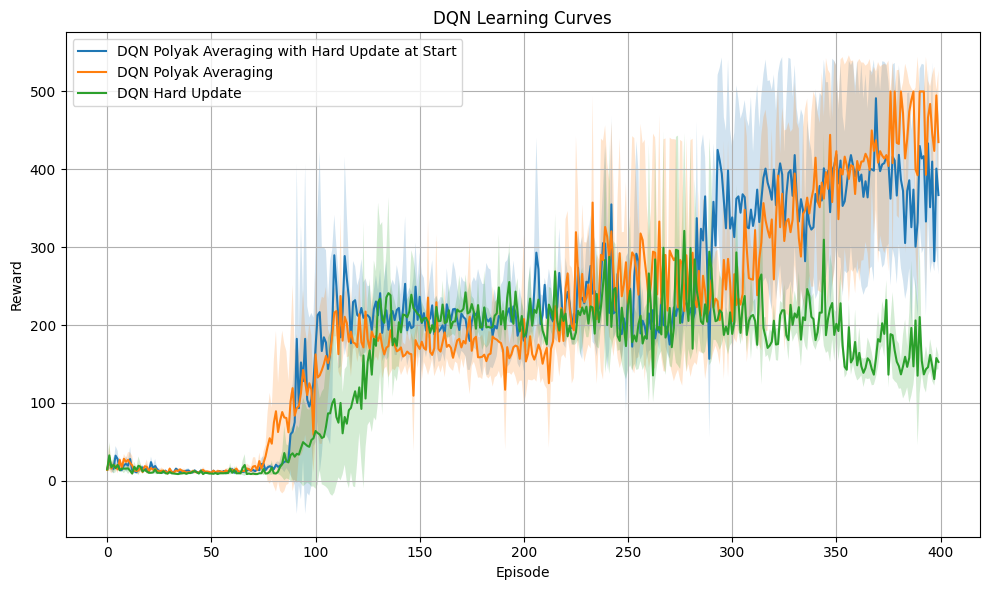

In [23]:
def plot_mean_std_curves(all_rewards_dict, title='DQN Learning Curves', xlabel='Episode', ylabel='Reward'):
    plt.figure(figsize=(10, 6))
    for label, rewards in all_rewards_dict.items():
        mean_rewards = rewards.mean(axis=0)
        std_rewards = rewards.std(axis=0)
        episodes = np.arange(len(mean_rewards))
        plt.plot(episodes, mean_rewards, label=label)
        plt.fill_between(episodes, mean_rewards - std_rewards, mean_rewards + std_rewards, alpha=0.2)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig("DQN experiment")
    plt.show()

plot_mean_std_curves({
    "DQN Polyak Averaging with Hard Update at Start": rewards_polyak_averaging_with_hard_start,
    "DQN Polyak Averaging": rewards_polyak_averaging,
    "DQN Hard Update": rewards_hard_update
})